# Convert data into right form for TCRDivER

In [1]:
import os
import pandas as pd
DATA_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data'

# Read all csv files and store them in a list with their original names
original_data = []
files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
for file in files:
    file_path = os.path.join(DATA_DIR, file)
    try:
        df = pd.read_csv(file_path)
        # Add the file information to the dataframe
        df.name = file.replace('.csv', '')  # Store the filename without .csv extension as an attribute
        original_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

In [2]:
# Show the indices of 'original_data' to verify the data
print(f"Total files read: {len(original_data)}")

Total files read: 60


In [3]:
# Show some names of the dataframes
print("Names of the dataframes:")
for df in original_data[:5]:
    print(df.name)

Names of the dataframes:
A10F1
A29F2
A30B
A30F1
A30F2


In [4]:
# Display the first few rows of the 'A09B' dataframe

# Set option to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width

for df in original_data:
    if df.name == 'A09B':
        print(df.head())
        break  # Stop after finding the first match

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

              barcode  is_cell                    contig_id  high_confidence  length chain    v_gene d_gene   j_gene c_gene  full_length  productive                        fwr1                                            fwr1_nt    cdr1             cdr1_nt               fwr2                                            fwr2_nt      cdr2                   cdr2_nt                                   fwr3                                            fwr3_nt               cdr3                                            cdr3_nt        fwr4                          fwr4_nt  reads  umis      raw_clonotype_id                  raw_consensus_id  exact_subclonotype_id
0  AAACCTGAGGCGTACA-1     True  AAACCTGAGGCGTACA-1_contig_1             True     518   TRB  TRBV20-1    NaN  TRBJ2-5  TRBC2         True        True  GAVVSQHPSWVICKSGTSVKIECRSL  GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...  DFQATT  GACTTTCAGGCCACAACT  MFWYRQFPKQSLMLMAT  ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...   SNEGSKA     T

In [5]:
# Display the columns of the 'A09B' dataframe
for df in original_data:
    if df.name == 'A09B':
        print(df.columns)
        break  # Stop after finding the first match

Index(['barcode', 'is_cell', 'contig_id', 'high_confidence', 'length', 'chain',
       'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive',
       'fwr1', 'fwr1_nt', 'cdr1', 'cdr1_nt', 'fwr2', 'fwr2_nt', 'cdr2',
       'cdr2_nt', 'fwr3', 'fwr3_nt', 'cdr3', 'cdr3_nt', 'fwr4', 'fwr4_nt',
       'reads', 'umis', 'raw_clonotype_id', 'raw_consensus_id',
       'exact_subclonotype_id'],
      dtype='object')


In [6]:
# Print the one dataframe shape before filtering
print(f"Shape of first dataframe before filtering: {original_data[1].shape}")

Shape of first dataframe before filtering: (1385, 31)


In [7]:
# Filter all dataframes to keep only 'TRB' chain rows
for i, df in enumerate(original_data):
    # Check if the dataframe has 'chain' column
    if 'chain' in df.columns:
        # Filter dataframe but preserve the name attribute
        filtered_df = df[df['chain'] == 'TRB']
        filtered_df.name = df.name  # Transfer the name attribute
        original_data[i] = filtered_df
    else:
        print(f"Warning: Dataframe {df.name} does not have a 'chain' column.")

# Print the one dataframe shape after filtering
print(f"Shape of first dataframe after filtering: {original_data[1].shape}")

Shape of first dataframe after filtering: (723, 31)


In [8]:
# Set option to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width

for df in original_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

              barcode  is_cell                    contig_id  high_confidence  length chain    v_gene d_gene   j_gene c_gene  full_length  productive                        fwr1                                            fwr1_nt   cdr1          cdr1_nt               fwr2                                            fwr2_nt    cdr2             cdr2_nt                                  fwr3                                            fwr3_nt              cdr3                                           cdr3_nt       fwr4                       fwr4_nt  reads  umis      raw_clonotype_id                  raw_consensus_id  exact_subclonotype_id
1  AAACCTGGTAATAGCA-1     True  AAACCTGGTAATAGCA-1_contig_2             True     491   TRB  TRBV24-1  TRBD1  TRBJ2-1  TRBC2         True        True  DADVTQTPRNRITKTGKRIMLECSQT  GATGCTGATGTTACCCAGACCCCAAGGAATAGGATCACAAAGACAG...  KGHDR  AAGGGTCATGATAGA  MYWYRQDPGLGLRLIYY  ATGTACTGGTATCGACAAGACCCAGGACTGGGCCTACGGTTGATCT...  SFDVKD  TCCTTTGATGTCAAAGAT  INKGEISDG

In [9]:
# Create a new list to store the modified dataframes
new_data = []

# Process each dataframe to create a new dataset with required columns
for i, df in enumerate(original_data):
    # Check if required columns exist
    if 'cdr3' in df.columns and 'umis' in df.columns and 'productive' in df.columns:
        # Create a new dataframe
        new_df = pd.DataFrame()
        
        # Copy the original dataframe name
        new_df.name = df.name
        
        # Copy the cdr3 column
        new_df['cdr3'] = df['cdr3']
        
        # Calculate productive_frequency (softmax of umis)
        total_umis = df['umis'].sum()
        new_df['productive_frequency'] = df['umis'] / total_umis if total_umis > 0 else 0
        
        # Determine frame_type based on productive column
        new_df['frame_type'] = df['productive'].apply(lambda x: 'In' if x == True else 'Out')
        
        # Add the new dataframe to new_data list
        new_data.append(new_df)
    else:
        print(f"Warning: Dataframe {df.name} is missing required columns.")

In [10]:
# Check one dataframe from the original_data list
for df in original_data:
    if df.name == 'A10B':
        print(df[['cdr3', 'umis', 'productive']].head())
        break  # Stop after finding the first match

               cdr3  umis  productive
1  CATSDGDRAVYNEQFF    27        True
2   CASSEQRTGVIEQYF    12        True
4   CASTPLGQTNQPQHF     4        True
6       CASSYSYGQYF    13        True
9     CASSLTGHREQYF    25        True


In [11]:
# Check one dataframe from the new_data list
for df in new_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

               cdr3  productive_frequency frame_type
1  CATSDGDRAVYNEQFF              0.001756         In
2   CASSEQRTGVIEQYF              0.000780         In
4   CASTPLGQTNQPQHF              0.000260         In
6       CASSYSYGQYF              0.000845         In
9     CASSLTGHREQYF              0.001626         In


In [12]:
for df in original_data:
    print(df['productive'].value_counts())

productive
True    1948
Name: count, dtype: int64
productive
True    723
Name: count, dtype: int64
productive
True    689
Name: count, dtype: int64
productive
True    1097
Name: count, dtype: int64
productive
True    509
Name: count, dtype: int64
productive
True    1845
Name: count, dtype: int64
productive
True    803
Name: count, dtype: int64
productive
True    987
Name: count, dtype: int64
productive
True    1201
Name: count, dtype: int64
productive
True    2541
Name: count, dtype: int64
productive
True    1537
Name: count, dtype: int64
productive
True    1240
Name: count, dtype: int64
productive
True    1786
Name: count, dtype: int64
productive
True    1611
Name: count, dtype: int64
productive
True    1809
Name: count, dtype: int64
productive
True    1150
Name: count, dtype: int64
productive
True    1758
Name: count, dtype: int64
productive
True    2471
Name: count, dtype: int64
productive
True    1389
Name: count, dtype: int64
productive
True    4700
Name: count, dtype: int64
produ

In [13]:
for df in new_data:
    print(df['frame_type'].value_counts())

frame_type
In    1948
Name: count, dtype: int64
frame_type
In    723
Name: count, dtype: int64
frame_type
In    689
Name: count, dtype: int64
frame_type
In    1097
Name: count, dtype: int64
frame_type
In    509
Name: count, dtype: int64
frame_type
In    1845
Name: count, dtype: int64
frame_type
In    803
Name: count, dtype: int64
frame_type
In    987
Name: count, dtype: int64
frame_type
In    1201
Name: count, dtype: int64
frame_type
In    2541
Name: count, dtype: int64
frame_type
In    1537
Name: count, dtype: int64
frame_type
In    1240
Name: count, dtype: int64
frame_type
In    1786
Name: count, dtype: int64
frame_type
In    1611
Name: count, dtype: int64
frame_type
In    1809
Name: count, dtype: int64
frame_type
In    1150
Name: count, dtype: int64
frame_type
In    1758
Name: count, dtype: int64
frame_type
In    2471
Name: count, dtype: int64
frame_type
In    1389
Name: count, dtype: int64
frame_type
In    4700
Name: count, dtype: int64
frame_type
In    2947
Name: count, dtype: int

In [14]:
# Sort and print the names of all dataframes in new_data
sorted_names = sorted([df.name for df in new_data])
print(sorted_names)

['A09B', 'A09F1', 'A10B', 'A10F1', 'A10F2', 'A11B', 'A11F1', 'A11F2', 'A12B', 'A12F1', 'A12F2', 'A14B', 'A14F1', 'A16B', 'A17B', 'A17F1', 'A18B', 'A18F1', 'A18F2', 'A19B', 'A19F1', 'A19F2', 'A20B', 'A20F2', 'A21B', 'A21F1', 'A21F2', 'A22B', 'A22F1', 'A22F2', 'A23B', 'A23F1', 'A23F2', 'A24B', 'A24F1', 'A24F2', 'A25B', 'A26B', 'A26F1', 'A26F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A29B', 'A29F1', 'A29F2', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A34B', 'A34F1', 'A34F2']


# TCRDiVER

## B-F1-F2

### Load datasets
Load datasets containing B and at least one following timepoint.

In [15]:
# Check one dataframe from the new_data list
for df in new_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

               cdr3  productive_frequency frame_type
1  CATSDGDRAVYNEQFF              0.001756         In
2   CASSEQRTGVIEQYF              0.000780         In
4   CASTPLGQTNQPQHF              0.000260         In
6       CASSYSYGQYF              0.000845         In
9     CASSLTGHREQYF              0.001626         In


In [16]:
from collections import defaultdict

# 1. 환자 ID별로 데이터프레임 그룹화
patient_dict = defaultdict(list)

for df in new_data:
    name = df.name  # 예: 'A10B'
    patient_id = name[1:-2] if name[-2] == 'F' else name[1:-1]  # '10', '21' 등
    patient_dict[patient_id].append(df)

# 2. 조건 만족하는 환자 ID만 필터링
filtered_data = []

for patient_id, dfs in patient_dict.items():
    timepoints = [df.name[len(patient_id)+1:] for df in dfs]  # 'B', 'F1', 'F2'
    
    if 'B' in timepoints and (('F1' in timepoints) or ('F2' in timepoints)):
        filtered_data.extend(dfs)  # 해당 환자의 모든 타임포인트 포함

# 3. 결과 확인
print(f"총 {len(filtered_data)}개의 샘플이 조건을 만족함.")
print(sorted([df.name for df in filtered_data]))

총 58개의 샘플이 조건을 만족함.
['A09B', 'A09F1', 'A10B', 'A10F1', 'A10F2', 'A11B', 'A11F1', 'A11F2', 'A12B', 'A12F1', 'A12F2', 'A14B', 'A14F1', 'A17B', 'A17F1', 'A18B', 'A18F1', 'A18F2', 'A19B', 'A19F1', 'A19F2', 'A20B', 'A20F2', 'A21B', 'A21F1', 'A21F2', 'A22B', 'A22F1', 'A22F2', 'A23B', 'A23F1', 'A23F2', 'A24B', 'A24F1', 'A24F2', 'A26B', 'A26F1', 'A26F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A29B', 'A29F1', 'A29F2', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A34B', 'A34F1', 'A34F2']


In [17]:
filtered_data[0].head()

,cdr3,productive_frequency,frame_type
0,CASIRDRAGYNEQFF,0.000578,In
4,CASSRGVKKTQYF,0.000536,In
6,CAISESRDQPQHF,0.000413,In
7,CASSLAASPTDTQYF,0.000248,In
9,CASSQGQPSTDTQYF,0.000330,In


In [18]:
import numpy as np

# 샘플별 입력용 데이터프레임 딕셔너리 만들기
tcrdiver_inputs = {}

for df in filtered_data:
    sample_name = df.name
    # 1. frame_type == 'In'만 사용
    df_in = df[df["frame_type"] == "In"].copy()
    
    # 2. 컬럼명 변경
    df_in = df_in.rename(columns={"cdr3": "amino_acid"})
    
    # 3. 필요한 컬럼만 유지
    df_in = df_in[["amino_acid", "productive_frequency"]].copy()
    
    # 4. 정상화 확인: 합이 1 안 되는 경우 경고 출력
    total = df_in["productive_frequency"].sum()
    if not np.isclose(total, 1.0):
        print(f"Warning: {sample_name}의 productive_frequency 합이 1이 아님.")
    
    # 5. 저장
    tcrdiver_inputs[sample_name] = df_in
# 확인
print(f"TCRDivER 입력으로 사용할 샘플 수: {len(tcrdiver_inputs)}")

TCRDivER 입력으로 사용할 샘플 수: 58


### BLOSUM45
!CAUTION! Computationally heavy

In [ ]:
from Bio import Align
from Bio.Align import substitution_matrices

# BLOSUM45 score-based distance 계산기
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM45")
aligner.mode = "global"
aligner.open_gap_score = -10  # 논문/코드와 일치시킴

def blosum45_distance(s1, s2):
    score12 = aligner.score(s1, s2)
    score11 = aligner.score(s1, s1)
    score22 = aligner.score(s2, s2)
    return 1 - score12 / max(score11, score22)

In [95]:
from tqdm import tqdm  # optional: 진행 표시

# 샘플별 거리 행렬 저장 딕셔너리
distance_matrices = {}

for sample_name, df in tqdm(tcrdiver_inputs.items()):
    seqs = df["amino_acid"].tolist()
    n = len(seqs)
    dist_mat = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            dist = blosum45_distance(seqs[i], seqs[j])
            dist_mat[i, j] = dist
            dist_mat[j, i] = dist  # 대칭 행렬
    
    distance_matrices[sample_name] = dist_mat

100%|██████████| 58/58 [18:20<00:00, 18.98s/it]


In [96]:
# 예시 확인
print(f"{len(distance_matrices)}개의 distance matrix 생성 완료.")
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

58개의 distance matrix 생성 완료.
(1150, 1150)
[[0.         0.63207547 0.83962264 0.74528302 0.63207547]
 [0.63207547 0.         0.73786408 0.64893617 0.5       ]
 [0.83962264 0.73786408 0.         0.74757282 0.66990291]
 [0.74528302 0.64893617 0.74757282 0.         0.5862069 ]
 [0.63207547 0.5        0.66990291 0.5862069  0.        ]]


In [97]:
BLOSUM45_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data\distance_blosum45'

# 폴더 없으면 생성
os.makedirs(BLOSUM45_DIR, exist_ok=True)

# 저장 루프
for sample_name, mat in distance_matrices.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    np.savez_compressed(out_path, dist=mat)

print(f"{len(distance_matrices)}개의 거리 행렬을 .npz 파일로 저장 완료했습니다.")

58개의 거리 행렬을 .npz 파일로 저장 완료했습니다.


### Diversity Profile
Calculate D(q, lambda)

In [19]:
import os
import numpy as np

BLOSUM45_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data\distance_blosum45'

# Load distance matrices from .npz files
distance_matrices = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('.npz') and not file.endswith('_diversity.npz'):
        sample_name = file[:-4]  # Remove .npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path)
        distance_matrices[sample_name] = data['dist']

# Check the loaded distance matrices
print(f"Loaded {len(distance_matrices)} distance matrices.")

Loaded 58 distance matrices.


In [20]:
# 예시 확인
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

(1150, 1150)
[[0.         0.63207547 0.83962264 0.74528302 0.63207547]
 [0.63207547 0.         0.73786408 0.64893617 0.5       ]
 [0.83962264 0.73786408 0.         0.74757282 0.66990291]
 [0.74528302 0.64893617 0.74757282 0.         0.5862069 ]
 [0.63207547 0.5        0.66990291 0.5862069  0.        ]]


In [ ]:
import pandas as pd

# 설정: q와 λ 값들
q_values = [0, 1, 2, 3, 4, 5, 6, np.inf]
lambda_values = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

# 저장할 dict
diversity_profiles = {}

for sample_name, df in tcrdiver_inputs.items():
    # Load distance matrix
    dist_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    dist_mat = np.load(dist_path)['dist']
    
    freqs = df["productive_frequency"].values
    n = len(freqs) # Number of unique sequences
    
    div_mat = np.zeros((len(q_values), len(lambda_values)))  # q × λ matrix
    
    for i, q in enumerate(q_values):
        for j, lam in enumerate(lambda_values):
            # 1. similarity kernel Z
            Z = np.exp(-lam * dist_mat)

            # dot product of (z_(i1), ..., z_(iS)) * (p_(i1), ..., p_(iS))^T
            Zp = np.dot(Z, freqs)

            # 2. diversity calculation
            if q == 0:
                if lam == 0:  # Shannon diversity when lambda = 0 (Actually not Shannon diversity, but a variant)
                    d_q = -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) # Avoid log2(0)
                else:
                    d_q = np.sum(freqs / Zp)
            elif q == 1:
                # Shannon Clonality
                if lam == 0:  # Shannon clonality when lambda = 0 (Acutually not Shannon clonality, but a variant)
                    unique_sequences = np.count_nonzero(freqs)  # Count of unique sequences
                    d_q = 1 -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) / np.log2(unique_sequences + np.finfo(float).eps)
                else:
                    d_q = np.exp(-np.sum(freqs * np.log2(Zp)))
            elif q == np.inf:
                d_q = 1.0 / np.max(Zp)
            else:
                d_q = np.power(np.sum(freqs * (Zp ** (q - 1))), 1 / (1 - q))
            
            div_mat[i, j] = d_q
    
    # 결과 저장
    div_df = pd.DataFrame(div_mat, index=q_values, columns=lambda_values)
    diversity_profiles[sample_name] = div_df

In [ ]:
# Save diversity profiles to npz files
for sample_name, div_df in diversity_profiles.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}_diversity.npz")
    np.savez_compressed(out_path, div=div_df.values, index=div_df.index, columns=div_df.columns)

## Load Diversity Profile

Run parts before 'BLOSUM45' to do following steps. 

In [22]:
import os
import numpy as np
import pandas as pd

BLOSUM45_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data\distance_blosum45'

# Load diversity profiles from .npz files
diversity_profiles = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('_diversity.npz'):
        sample_name = file.split('_diversity.npz')[0]  # Remove _diversity.npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path, allow_pickle=True)
        # Reconstruct the DataFrame with proper index and columns
        div_df = pd.DataFrame(
            data['div'], 
            index=data['index'], 
            columns=data['columns']
        )
        diversity_profiles[sample_name] = div_df

# Check the loaded diversity profiles
print(f"Loaded {len(diversity_profiles)} diversity profiles.")

Loaded 58 diversity profiles.


In [23]:
# Check if any samples are missing
expected_samples = [name for name in sorted_names if name in tcrdiver_inputs]
missing = [name for name in expected_samples if name not in diversity_profiles]
if missing:
    print(f"Warning: {len(missing)} samples are missing diversity profiles: {missing}")

In [24]:
# Check one diversity profile
for sample_name, div_df in diversity_profiles.items():
    print(f"Diversity profile for {sample_name}:")
    print(div_df.head())
    break  # Stop after checking the first profile

Diversity profile for A10F1:
         0.00      0.10      0.20      0.25      0.30      0.40      0.50   \
0.0  10.657675  1.069899  1.144532  1.183718  1.224202  1.309235  1.399971   
1.0   1.975283  1.102364  1.214929  1.275339  1.338674  1.474668  1.624075   
2.0   1.000000  1.069873  1.144418  1.183533  1.223927  1.308708  1.399085   
3.0   1.000000  1.069860  1.144361  1.183442  1.223790  1.308446  1.398646   
4.0   1.000000  1.069847  1.144305  1.183350  1.223654  1.308187  1.398211   

        0.75      1.00      1.50      2.00       4.00        8.00   \
0.0  1.654198  1.952653  2.711933  3.747996  12.824953   99.007610   
1.0  2.064895  2.620914  4.198850  6.670166  37.864456  511.430135   
2.0  1.651798  1.947518  2.695186  3.704728  12.021872   54.206760   
3.0  1.650618  1.945008  2.687099  3.684088  11.651137   40.878948   
4.0  1.649451  1.942538  2.679214  3.664155  11.307392   33.818177   

           16.00        32.00        64.00  
0.0   637.442089   817.825692   824.

In [25]:
# A10B 다양도 프로파일 확인
print(diversity_profiles['A10B'].round(3))

     0.00   0.10   0.20   0.25   0.30   0.40   0.50   0.75   1.00   1.50   \
0.0  9.891  1.071  1.147  1.187  1.228  1.314  1.407  1.666  1.972  2.754   
1.0  1.973  1.104  1.218  1.280  1.344  1.483  1.636  2.087  2.660  4.297   
2.0  1.000  1.071  1.147  1.186  1.227  1.314  1.406  1.664  1.968  2.740   
3.0  1.000  1.071  1.147  1.186  1.227  1.314  1.406  1.663  1.966  2.733   
4.0  1.000  1.071  1.147  1.186  1.227  1.313  1.405  1.662  1.963  2.726   
5.0  1.000  1.071  1.146  1.186  1.227  1.313  1.405  1.661  1.961  2.720   
6.0  1.000  1.071  1.146  1.186  1.227  1.313  1.404  1.660  1.959  2.714   
inf  1.000  1.061  1.126  1.160  1.195  1.268  1.345  1.557  1.801  2.403   

     2.00    4.00     8.00      16.00     32.00     64.00  
0.0  3.829  13.413  100.054   468.416   548.075   549.873  
1.0  6.889  41.102  615.477  2970.423  3295.005  3303.979  
2.0  3.793  12.887   72.116   132.725   135.426   135.508  
3.0  3.776  12.651   60.688    86.453    87.193    87.207  
4.0  3

### Plots

#### Add BR info
Change Kernel to do this since read_excel doesn't work on Python 3.6

In [26]:
WD = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY'
# From WD, load the BR_info.xlsx
BR_info = pd.read_excel(os.path.join(WD, 'BR_info.xlsx'))
BR_info.head()

,patient_ids,BR,resp_or_not
0,A09,PR,R
1,A10,SD,NR
2,A11,PR,R
3,A12,SD,NR
4,A13,PD,NR


In [27]:
# Remove 'A' from patient IDs in BR_info
BR_info['patient_ids'] = BR_info['patient_ids'].str.replace('A', '', regex=False)
BR_info['patient_ids'].head()

0    09
1    10
2    11
3    12
4    13
Name: patient_ids, dtype: object

In [28]:
diversity_profiles.keys()

dict_keys(['A10F1', 'A10B', 'A10F2', 'A29F2', 'A29F1', 'A29B', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A17F1', 'A17B', 'A19F2', 'A19F1', 'A19B', 'A12F2', 'A12F1', 'A12B', 'A20B', 'A20F2', 'A18B', 'A18F1', 'A18F2', 'A11B', 'A11F1', 'A11F2', 'A09F1', 'A09B', 'A21B', 'A21F2', 'A21F1', 'A14B', 'A14F1', 'A22B', 'A22F1', 'A22F2', 'A23F1', 'A23B', 'A23F2', 'A26B', 'A26F1', 'A26F2', 'A24B', 'A24F1', 'A24F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A34B', 'A34F2', 'A34F1'])

In [29]:
import matplotlib.pyplot as plt

# lambda 값들 (모든 샘플에서 동일하다고 가정)
example_sample = next(iter(diversity_profiles.values()))
lambda_values = example_sample.columns

# 모든 sample name 리스트
all_samples = list(diversity_profiles.keys())

# 환자 ID 기준으로 그룹화
from collections import defaultdict

patient_samples = defaultdict(list)

for sample_name in all_samples:
    patient_id = sample_name[1:-2] if sample_name[-2] == 'F' else sample_name[1:-1]
    patient_samples[patient_id].append(sample_name)

sorted(patient_samples.keys())

['09',
 '10',
 '11',
 '12',
 '14',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '26',
 '27',
 '28',
 '29',
 '30',
 '32',
 '33',
 '34']

In [30]:
# Create a sorting function that orders by response status (R, ATMmut., NR) and then by patient number
def sort_key(patient_key):
    # Split the key to get patient number and response status
    parts = patient_key.split(' - ')
    patient_num = int(parts[0])
    resp_status = parts[1] if len(parts) > 1 else ''
    
    # Assign priority to response status (R: 0, ATMmut.: 1, NR: 2)
    resp_priority = {'R': 0, 'ATMmut.': 1, 'NR': 2}.get(resp_status, 3)
    
    # Return tuple for sorting (response priority, patient number)
    return (resp_priority, patient_num)

# Create a new sorted dictionary
# Create a mapping of patient ID to response status from BR_info
patient_response_map = dict(zip(BR_info['patient_ids'], BR_info['resp_or_not']))

# Create a sorted dictionary based on response groups
sorted_patient_samples = {}

# First create patient keys with response status
patient_keys = []
for patient_num in patient_samples.keys():
    response_status = patient_response_map.get(patient_num, '')
    patient_key = f"{patient_num} - {response_status}"
    patient_keys.append(patient_key)

# Sort the patient keys
sorted_keys = sorted(patient_keys, key=sort_key)

# Create the sorted dictionary
for key in sorted_keys:
    patient_num = key.split(' - ')[0]
    sorted_patient_samples[key] = patient_samples[patient_num]

sorted_patient_samples

{'09 - R': ['A09F1', 'A09B'],
 '11 - R': ['A11B', 'A11F1', 'A11F2'],
 '18 - R': ['A18B', 'A18F1', 'A18F2'],
 '19 - R': ['A19F2', 'A19F1', 'A19B'],
 '21 - R': ['A21B', 'A21F2', 'A21F1'],
 '23 - R': ['A23F1', 'A23B', 'A23F2'],
 '29 - R': ['A29F2', 'A29F1', 'A29B'],
 '30 - R': ['A30B', 'A30F1', 'A30F2'],
 '32 - R': ['A32B', 'A32F1', 'A32F2'],
 '26 - ATMmut.': ['A26B', 'A26F1', 'A26F2'],
 '28 - ATMmut.': ['A28B', 'A28F2'],
 '34 - ATMmut.': ['A34B', 'A34F2', 'A34F1'],
 '10 - NR': ['A10F1', 'A10B', 'A10F2'],
 '12 - NR': ['A12F2', 'A12F1', 'A12B'],
 '14 - NR': ['A14B', 'A14F1'],
 '17 - NR': ['A17F1', 'A17B'],
 '20 - NR': ['A20B', 'A20F2'],
 '22 - NR': ['A22B', 'A22F1', 'A22F2'],
 '24 - NR': ['A24B', 'A24F1', 'A24F2'],
 '27 - NR': ['A27B', 'A27F1', 'A27F2'],
 '33 - NR': ['A33B', 'A33F1', 'A33F2']}

In [31]:
# Replace the original dictionary with the updated one
patient_samples = sorted_patient_samples

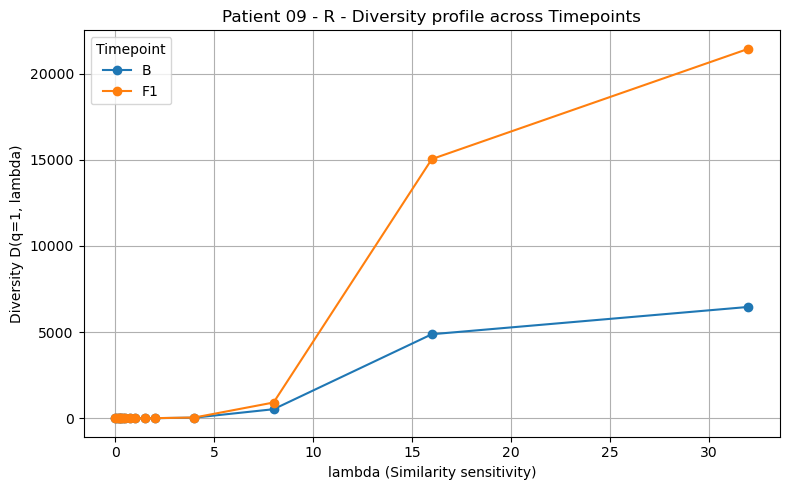

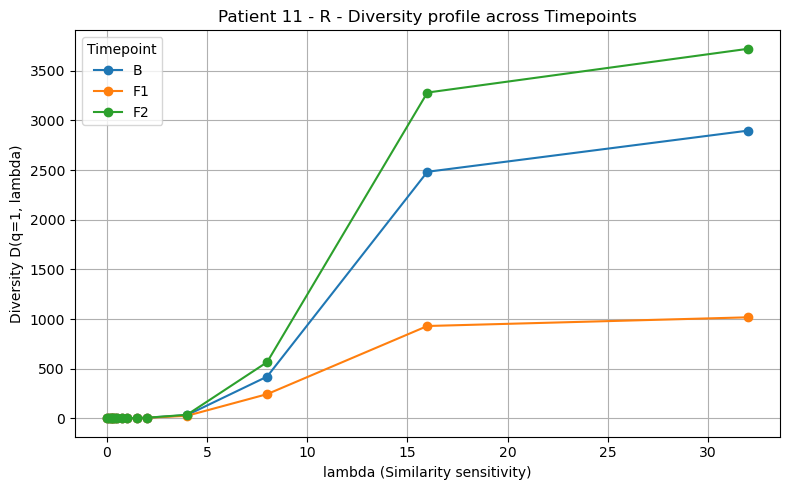

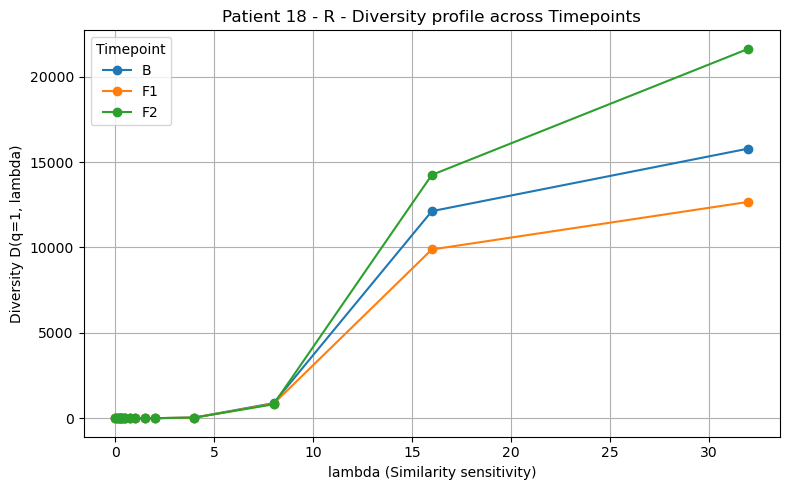

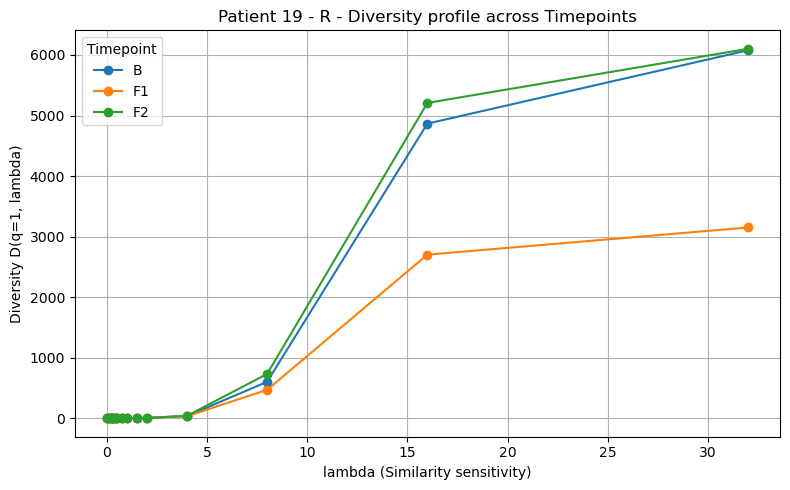

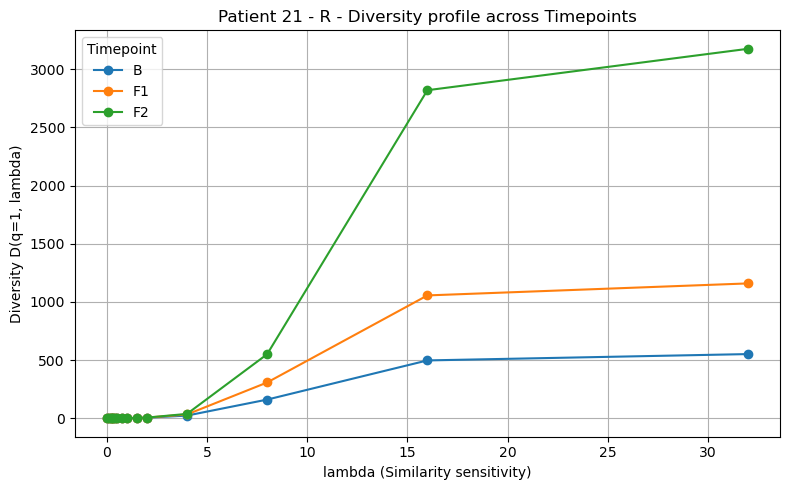

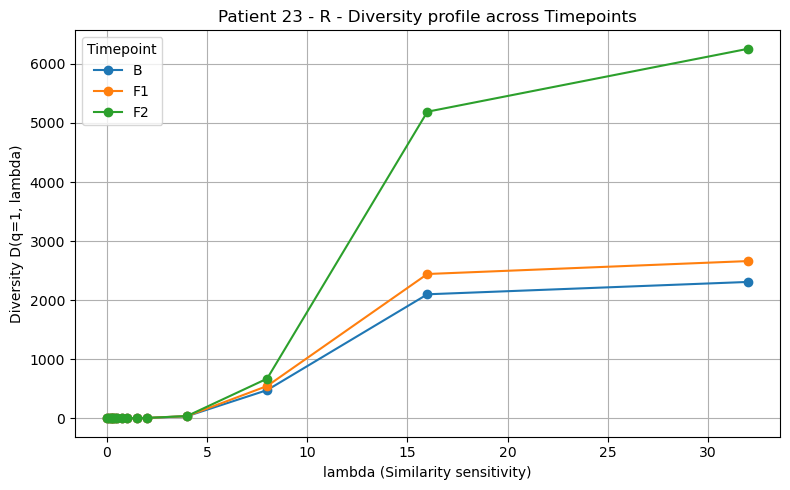

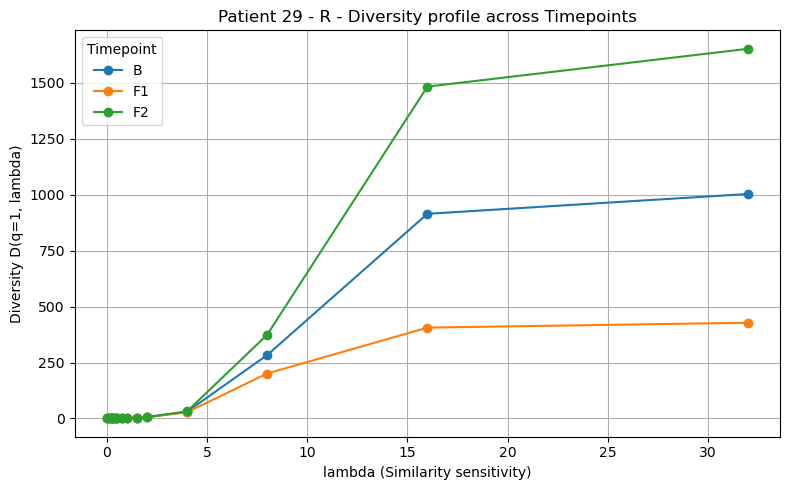

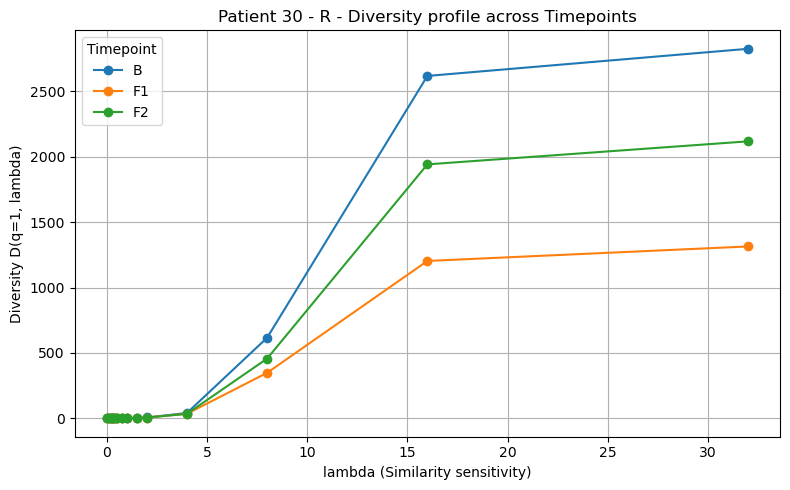

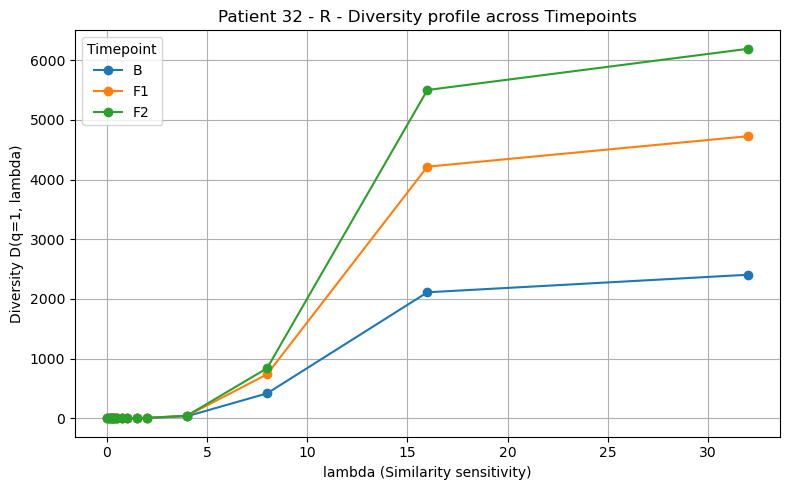

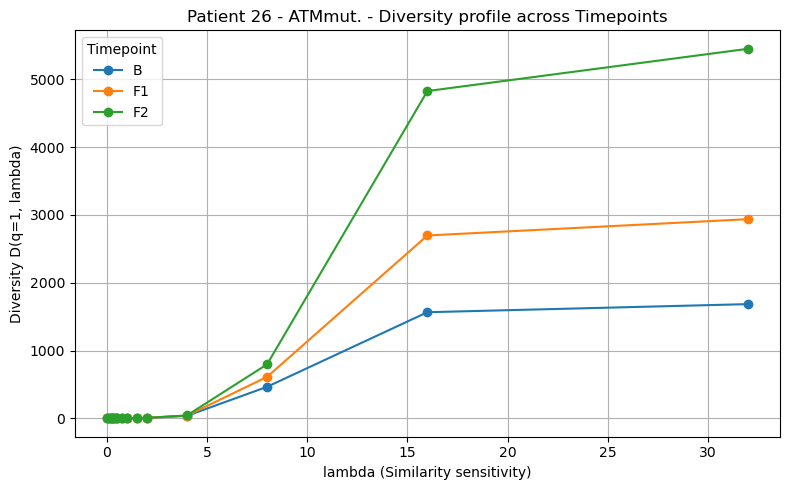

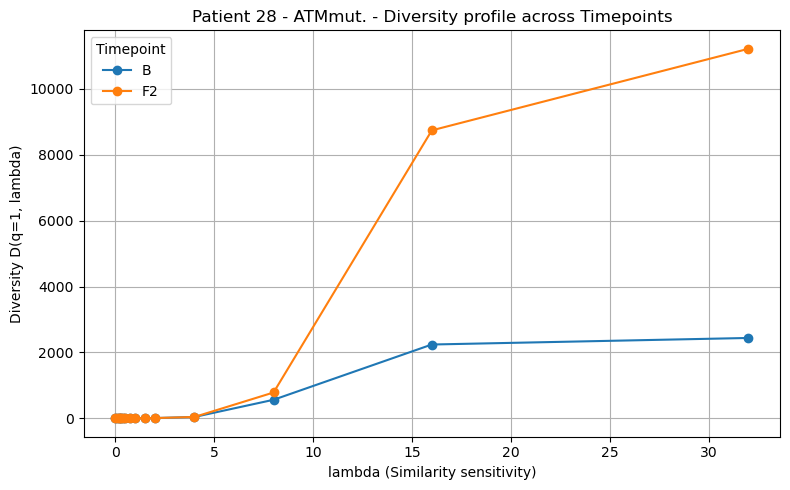

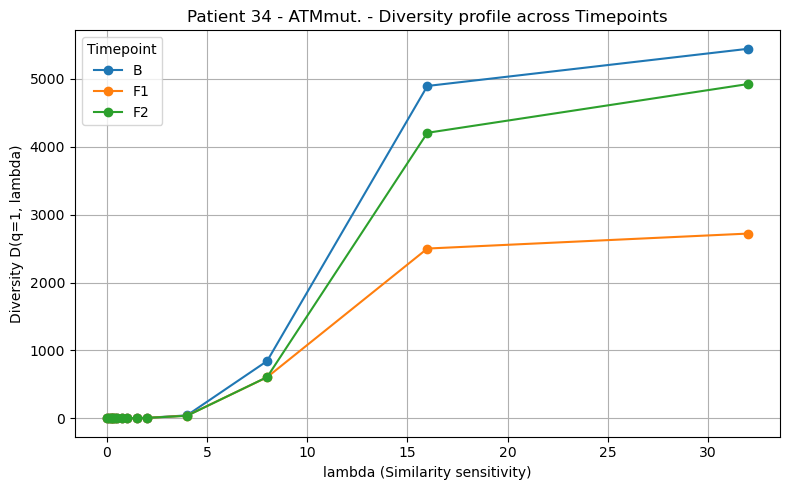

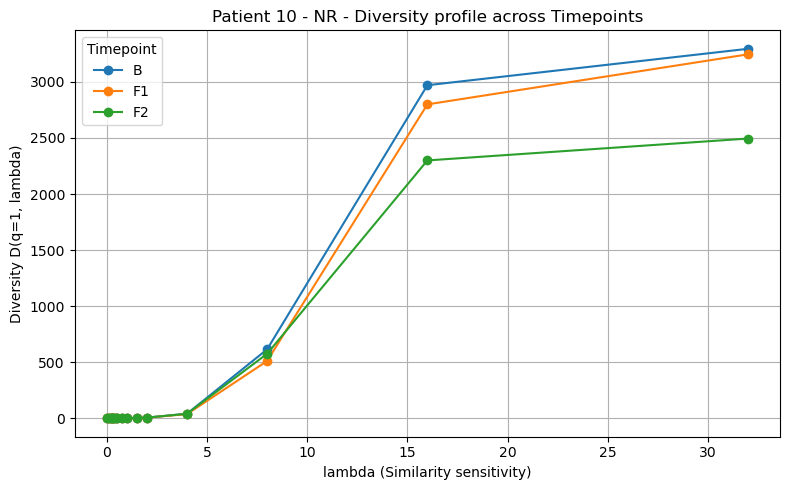

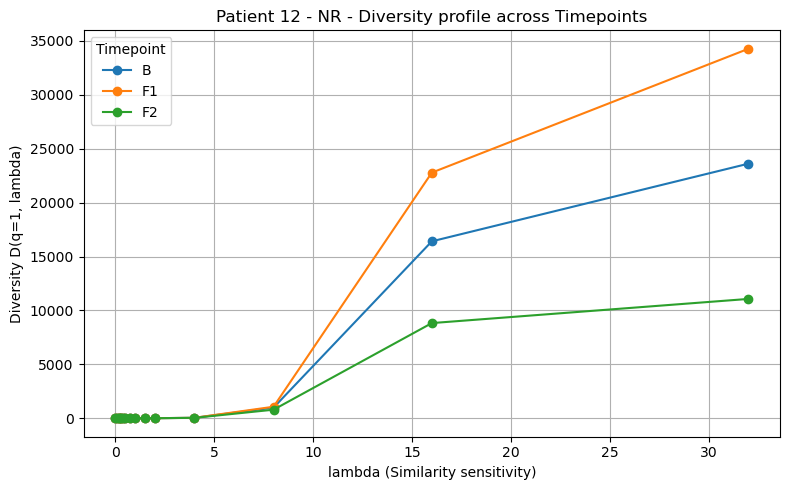

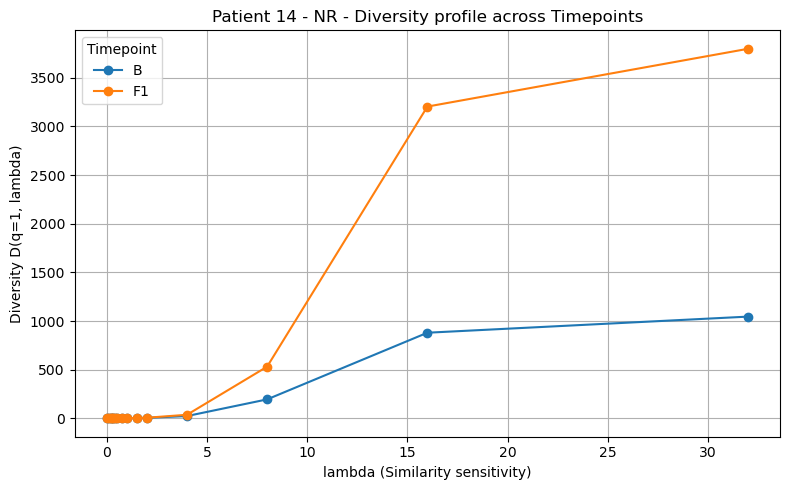

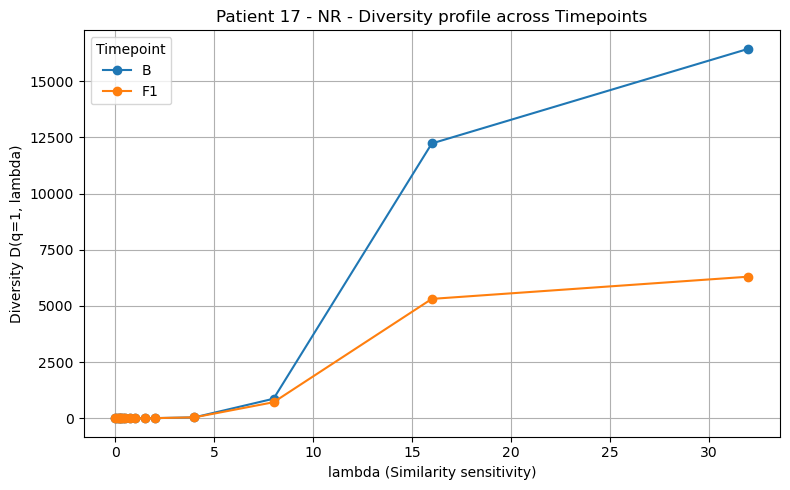

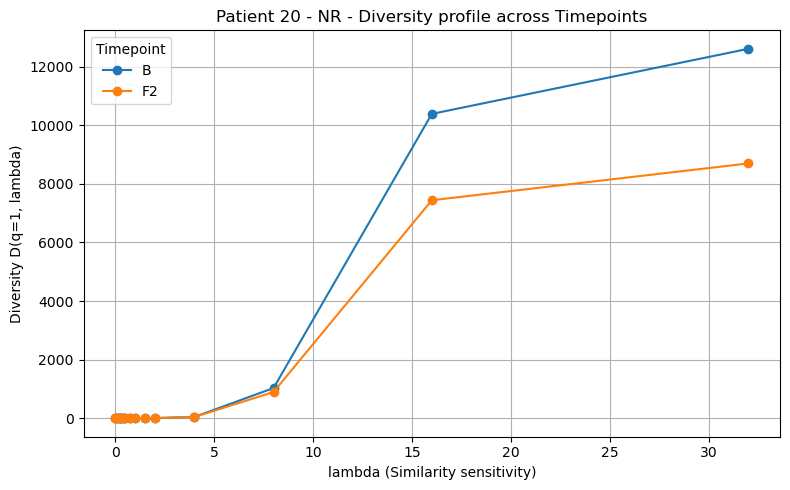

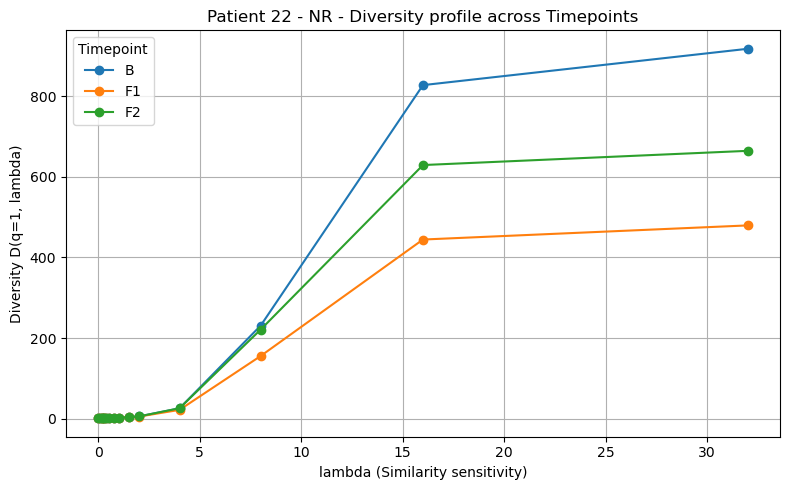

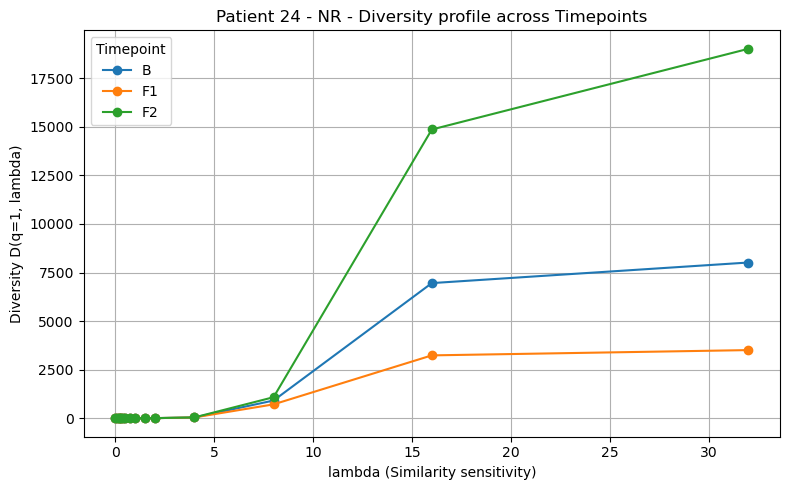

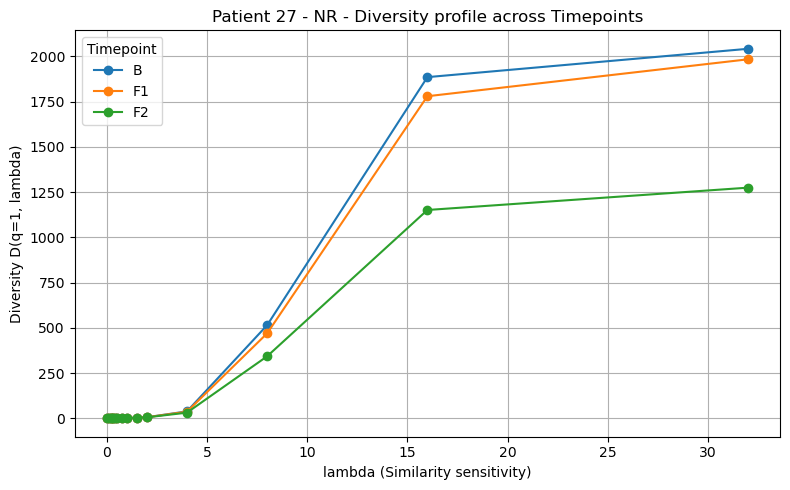

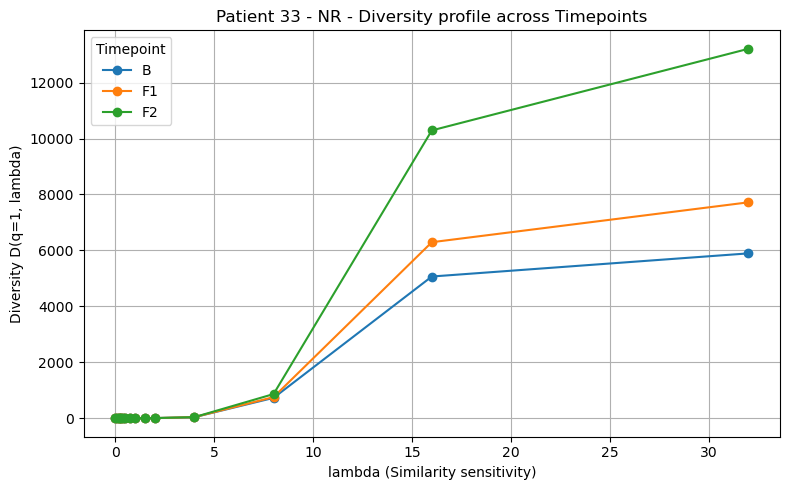

In [32]:
# 설정: q와 λ 값들
lambda_values = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0]
# 고정할 q 값
q_fixed = 1

# 실제 plot 수행
for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # 타임포인트가 2개 이상이어야 의미 있음
    if len(sample_list) < 2:
        continue

    # B 있는지 확인
    if not any('B' in s for s in sample_list):
        continue

    # 시간순 정렬 (B, F1, F2 순서)
    time_sorted = []
    patient_num = patient_id.split(' - ')[0]  # Extract patient number without response status
    for label in ['B', 'F1', 'F2']:
        full_name = f"A{patient_num}{label}"
        if full_name in sample_list:
            time_sorted.append(full_name)
    
    # 타임포인트가 비어있으면 건너뛰기
    if not time_sorted:
        continue
        
    # 실제 plot
    plt.figure(figsize=(8, 5))
    for sample_id in time_sorted:
        # Extract timepoint label (B, F1, F2)
        label = sample_id[-2:] if sample_id[-2] == 'F' else 'B'
        if sample_id in diversity_profiles:
            df = diversity_profiles[sample_id]
            y_vals = df.loc[q_fixed][lambda_values].values
            plt.plot(lambda_values, y_vals, label=label, marker='o')
    
    # 스타일 설정
    plt.xlabel("lambda (Similarity sensitivity)")
    plt.ylabel(f"Diversity D(q={q_fixed}, lambda)")
    plt.title(f"Patient {patient_id} - Diversity profile across Timepoints")
    plt.legend(title="Timepoint")
    plt.grid(True)
    plt.xscale('linear')
    # plt.xscale('log')  # Better visualization with log scale for lambda
    plt.tight_layout()
    plt.show()

### Rating Heatmap

Show the rating of diversity by timepoints for each patient IDs.

In [33]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# Set fixed q and lambda values (choose one of the following)
q_fixed = 1; lambda_fixed = 8 # Based on the plot above

# Shannon Diversity
# lambda_fixed = 0; q_fixed = 0 # Shannon Diversity

# Shannon Clonality
# lambda_fixed = 0; q_fixed = 1 # Shannon Clonality

#### For all samples

In [34]:
# Prepare data for the heatmap
patients = []
response_groups = []
diversity_data = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least two timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 2:
        patients.append(patient_num)
        response_groups.append(response_status)
        diversity_data.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T

print("Diversity data shape:", normalized_data.shape)
print(diversity_data[:2])

Diversity data shape: (3, 21)
[[525.1383082358881, 914.0036601325685, None], [420.5713106595868, 243.75219967000677, 566.201796624595]]


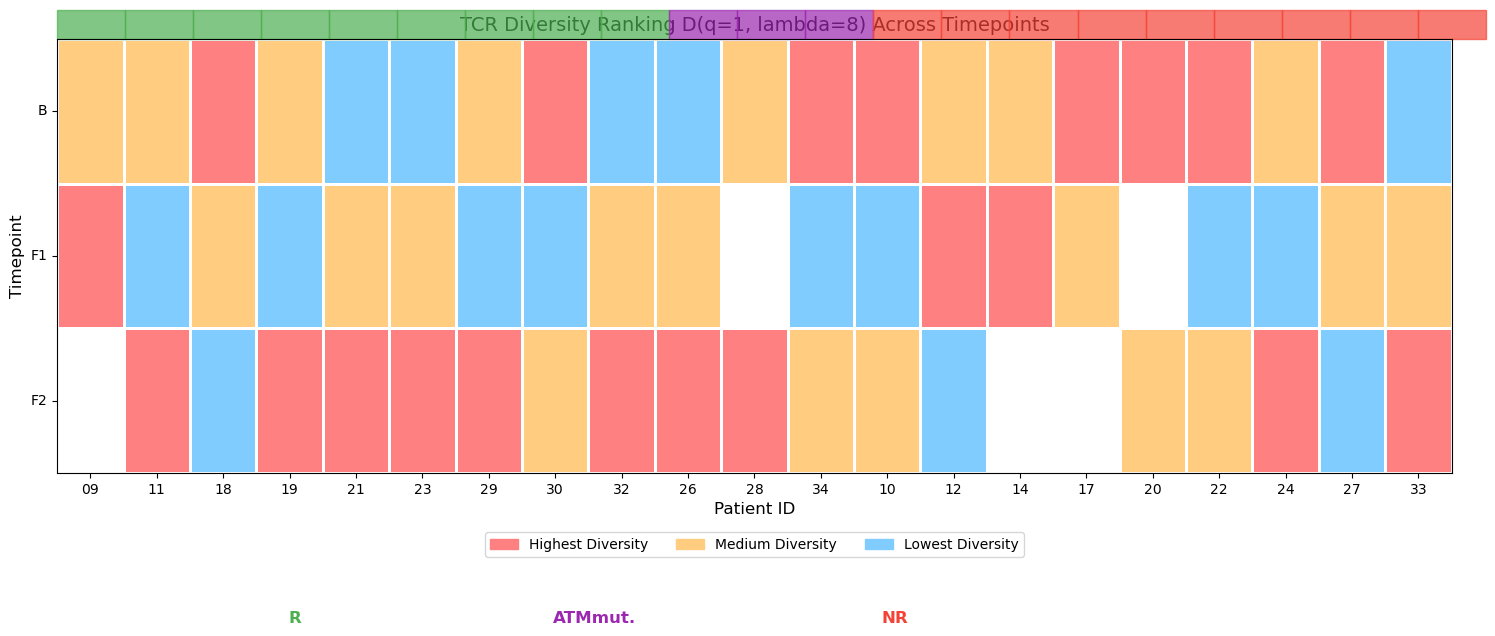

In [35]:
# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients, Y-axis is timepoints
plt.xticks(np.arange(len(patients)) + 0.5, patients)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
if q_fixed == 0 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Diversity Across Timepoints', fontsize=14)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Clonality Across Timepoints', fontsize=14)
else:
    plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

#### For intact T.P.s

In [36]:
# Prepare data for the heatmap
patients_intact = []
response_groups_intact = []
diversity_data_intact = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least two timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 3:
        patients_intact.append(patient_num)
        response_groups_intact.append(response_status)
        diversity_data_intact.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data_intact], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T

print("Diversity data shape:", normalized_data.shape)
print(diversity_data_intact[:2])

Diversity data shape: (3, 16)
[[420.5713106595868, 243.75219967000677, 566.201796624595], [886.3917346991634, 849.1918011673718, 817.4711447204464]]


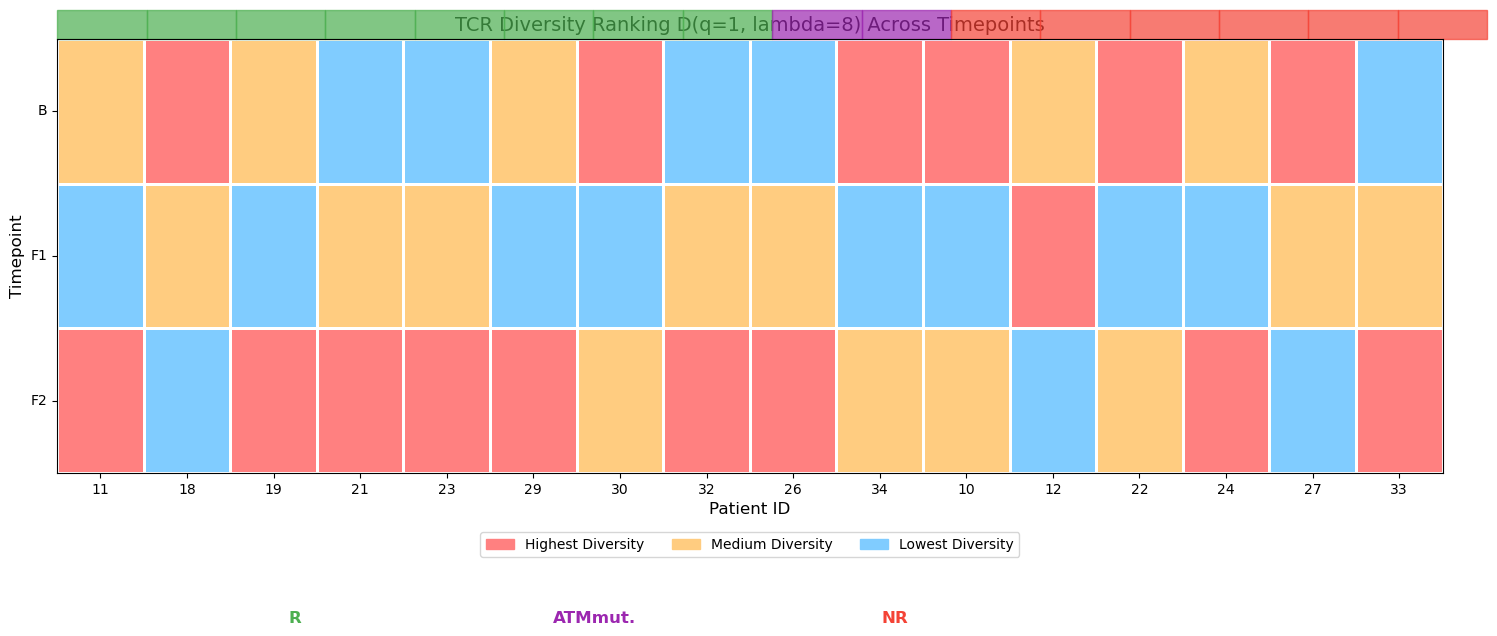

In [37]:
# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients_intact, Y-axis is timepoints
plt.xticks(np.arange(len(patients_intact)) + 0.5, patients_intact)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients_intact)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups_intact):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

### Box + Vln

Box + Vln plot of
- Standardization
- Normalization
- Softmax

In [38]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df = pd.DataFrame(diversity_data, columns=['B', 'F1', 'F2'])
diversity_df['patient'] = patients
diversity_df['response'] = response_groups
# Reorder columns if desired
diversity_df = diversity_df[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df)

   patient response            B           F1           F2
0       09        R   525.138308   914.003660          NaN
1       11        R   420.571311   243.752200   566.201797
2       18        R   886.391735   849.191801   817.471145
3       19        R   603.288877   470.234461   732.190407
4       21        R   161.357236   308.235133   550.971223
5       23        R   477.424227   546.555029   671.445996
6       29        R   283.299996   201.076420   373.994397
7       30        R   616.223350   348.148471   456.941579
8       32        R   417.554869   737.113596   839.246802
9       26  ATMmut.   465.176607   611.829753   796.926990
10      28  ATMmut.   561.892700          NaN   783.241713
11      34  ATMmut.   844.072870   605.715465   607.321612
12      10       NR   615.476678   511.430135   575.688660
13      12       NR   988.571959  1068.527119   795.077907
14      14       NR   194.887122   530.990905          NaN
15      17       NR   870.042471   714.134988          N

In [39]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df_intact = pd.DataFrame(diversity_data_intact, columns=['B', 'F1', 'F2'])
diversity_df_intact['patient'] = patients_intact
diversity_df_intact['response'] = response_groups_intact
# Reorder columns if desired
diversity_df_intact = diversity_df_intact[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df_intact)

   patient response           B           F1           F2
0       11        R  420.571311   243.752200   566.201797
1       18        R  886.391735   849.191801   817.471145
2       19        R  603.288877   470.234461   732.190407
3       21        R  161.357236   308.235133   550.971223
4       23        R  477.424227   546.555029   671.445996
5       29        R  283.299996   201.076420   373.994397
6       30        R  616.223350   348.148471   456.941579
7       32        R  417.554869   737.113596   839.246802
8       26  ATMmut.  465.176607   611.829753   796.926990
9       34  ATMmut.  844.072870   605.715465   607.321612
10      10       NR  615.476678   511.430135   575.688660
11      12       NR  988.571959  1068.527119   795.077907
12      22       NR  230.797573   155.447441   220.967350
13      24       NR  913.379948   715.561233  1084.357591
14      27       NR  514.840583   469.683478   343.091341
15      33       NR  729.399658   756.958843   865.778674


#### Standardize

min-Max scaling

In [40]:
diversity_df_intact_standardized = []
# Standardize the diversity data for each patient
for patient_data in diversity_df_intact[['B', 'F1', 'F2']].values:
    # Calculate mean and std, ignoring NaN values
    mean = np.nanmean(patient_data)
    std = np.nanstd(patient_data)
    
    # Standardize: (x - mean) / std
    standardized_data = (patient_data - mean) / std if std > 0 else patient_data - mean  # Avoid division by zero
    diversity_df_intact_standardized.append(standardized_data)

# Check if the standardization worked
diversity_df_intact_standardized = pd.DataFrame(
    diversity_df_intact_standardized,
    columns=['B', 'F1', 'F2']
)
# Insert 'patient' and 'response' columns at the front
diversity_df_intact_standardized.insert(0, 'response', diversity_df_intact['response'].values)
diversity_df_intact_standardized.insert(0, 'patient', diversity_df_intact['patient'].values)
print(diversity_df_intact_standardized)

   patient response         B        F1        F2
0       11        R  0.078852 -1.262266  1.183414
1       18        R  1.255879 -0.064844 -1.191035
2       19        R  0.012944 -1.231165  1.218222
3       21        R -1.113128 -0.198889  1.312017
4       23        R -1.092481 -0.231489  1.323970
5       29        R -0.039982 -1.204264  1.244246
6       30        R  1.294006 -1.141130 -0.152876
7       32        R -1.375583  0.403490  0.972094
8       26  ATMmut. -1.174810 -0.094407  1.269216
9       34  ATMmut.  1.414189 -0.714266 -0.699923
10      10       NR  1.118466 -1.308750  0.190284
11      12       NR  0.329677  1.026163 -1.355840
12      22       NR  0.848959 -1.403995  0.555037
13      24       NR  0.059372 -1.253351  1.193979
14      27       NR  0.994580  0.373404 -1.367984
15      33       NR -0.928110 -0.460044  1.388154


In [41]:
from scipy.stats import normaltest, levene, ttest_ind, mannwhitneyu

stat_results = {}

for tp in ['B', 'F1', 'F2']:
    group_r = diversity_df_intact.loc[diversity_df_intact['response'] == 'R', tp].dropna()
    group_other = diversity_df_intact.loc[diversity_df_intact['response'].isin(['ATMmut.', 'NR']), tp].dropna()

    # Normality test (H0: data is normal)
    stat_r, p_r = normaltest(group_r)
    stat_other, p_other = normaltest(group_other)

    # Equal variance test (H0: variances are equal)
    stat_var, p_var = levene(group_r, group_other)

    # If both groups are normal and variances are equal, use t-test
    if p_r > 0.05 and p_other > 0.05 and p_var > 0.05:
        stat, p = ttest_ind(group_r, group_other, equal_var=True, alternative='two-sided')
        test_used = "t-test"
    else:
        stat, p = mannwhitneyu(group_r, group_other, alternative='two-sided')
        test_used = "Mann-Whitney U"

    # Store stat_results with timepoint label
    stat_results[f'test_used_{tp}'] = test_used
    stat_results[f'p_r_{tp}'] = p_r
    stat_results[f'p_other_{tp}'] = p_other
    stat_results[f'p_var_{tp}'] = p_var
    stat_results[f'p_{tp}'] = p

    print(f"\nTimepoint: {tp}")
    print(f"Normality p-value (R): {p_r:.4f}")
    print(f"Normality p-value (ATMmut. & NR): {p_other:.4f}")
    print(f"Equal variance p-value: {p_var:.4f}")
    print(f"{test_used} p-value: {p:.4f}")


Timepoint: B
Normality p-value (R): 0.6906
Normality p-value (ATMmut. & NR): 0.8279
Equal variance p-value: 0.5338
t-test p-value: 0.1561

Timepoint: F1
Normality p-value (R): 0.5906
Normality p-value (ATMmut. & NR): 0.5494
Equal variance p-value: 0.8884
t-test p-value: 0.2507

Timepoint: F2
Normality p-value (R): 0.6774
Normality p-value (ATMmut. & NR): 0.9239
Equal variance p-value: 0.1900
t-test p-value: 0.7675


c:\Users\iipms\miniconda3\envs\svdd_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### Softmax

In [42]:
diversity_df_intact_softmax = []
# Calculate softmax diversity for each patient
for patient_data in diversity_df_intact[['B', 'F1', 'F2']].values:
    # Calculate total diversity, ignoring NaN values
    total_diversity = np.nansum(patient_data)
    
    # Calculate diversity: value / total_diversity
    softmax_data = patient_data / total_diversity if total_diversity > 0 else patient_data  # Avoid division by zero
    diversity_df_intact_softmax.append(softmax_data)

# Check if the softmax calculation worked
diversity_df_intact_softmax = pd.DataFrame(
    diversity_df_intact_softmax,
    columns=['B', 'F1', 'F2']
)
# Insert 'patient' and 'response' columns at the front
diversity_df_intact_softmax.insert(0, 'response', diversity_df_intact['response'].values)
diversity_df_intact_softmax.insert(0, 'patient', diversity_df_intact['patient'].values)
print(diversity_df_intact_softmax)

   patient response         B        F1        F2
0       11        R  0.341782  0.198088  0.460130
1       18        R  0.347189  0.332618  0.320193
2       19        R  0.334100  0.260415  0.405485
3       21        R  0.158106  0.302024  0.539870
4       23        R  0.281596  0.322370  0.396034
5       29        R  0.330044  0.234254  0.435703
6       30        R  0.433559  0.244948  0.321492
7       32        R  0.209415  0.369682  0.420904
8       26  ATMmut.  0.248235  0.326495  0.425270
9       34  ATMmut.  0.410320  0.294450  0.295231
10      10       NR  0.361493  0.300383  0.338124
11      12       NR  0.346603  0.374636  0.278762
12      22       NR  0.380094  0.256002  0.363905
13      24       NR  0.336631  0.263724  0.399645
14      27       NR  0.387793  0.353780  0.258427
15      33       NR  0.310101  0.321817  0.368082


In [43]:
from scipy.stats import normaltest, levene, ttest_ind, mannwhitneyu

# Initialize a dictionary to store results
stat_results_in_tps = {}

for tp in ['B', 'F1', 'F2']:
    group_r = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', tp].dropna()
    group_other = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'].isin(['ATMmut.', 'NR']), tp].dropna()

    # Normality test (H0: data is normal)
    stat_r, p_r = normaltest(group_r)
    stat_other, p_other = normaltest(group_other)

    # Equal variance test (H0: variances are equal)
    stat_var, p_var = levene(group_r, group_other)

    # Use Mann-Whitney U test if either group is small
    if len(group_r) < 20 or len(group_other) < 20:
        stat, p = mannwhitneyu(group_r, group_other, alternative='two-sided')
        test_used = "Mann-Whitney U"
    else:
        # If both groups are normal and variances are equal, use t-test
        if p_r > 0.05 and p_other > 0.05 and p_var > 0.05:
            stat, p = ttest_ind(group_r, group_other, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif p_r > 0.05 and p_other > 0.05:
            stat, p = ttest_ind(group_r, group_other, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group_r, group_other, alternative='two-sided')
            test_used = "Mann-Whitney U"

    # Store results with timepoint label
    stat_results_in_tps[f'test_used_{tp}'] = test_used
    stat_results_in_tps[f'p_r_{tp}'] = p_r
    stat_results_in_tps[f'p_other_{tp}'] = p_other
    stat_results_in_tps[f'p_var_{tp}'] = p_var
    stat_results_in_tps[f'p_{tp}'] = p

    print(f"\nTimepoint: {tp}")
    print(f"Normality p-value (R): {p_r:.4f}")
    print(f"Normality p-value (ATMmut. & NR): {p_other:.4f}")
    print(f"Equal variance p-value: {p_var:.4f}")
    print(f"{test_used} p-value: {p:.4f}")


Timepoint: B
Normality p-value (R): 0.7704
Normality p-value (ATMmut. & NR): 0.2824
Equal variance p-value: 0.4004
Mann-Whitney U p-value: 0.2345

Timepoint: F1
Normality p-value (R): 0.7798
Normality p-value (ATMmut. & NR): 0.8659
Equal variance p-value: 0.2015
Mann-Whitney U p-value: 0.3823

Timepoint: F2
Normality p-value (R): 0.8328
Normality p-value (ATMmut. & NR): 0.6395
Equal variance p-value: 0.8658
Mann-Whitney U p-value: 0.0650


c:\Users\iipms\miniconda3\envs\svdd_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [44]:
# Initialize a dictionary to store results for comparison between 3 timepoints in R group
stat_results_in_r = {}

group_r_b = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'B']
group_r_f1 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'F1']
group_r_f2 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'F2']

# Normality test (H0: data is normal)
stat_r_b, p_r_b = normaltest(group_r_b)
stat_r_f1, p_r_f1 = normaltest(group_r_f1)
stat_r_f2, p_r_f2 = normaltest(group_r_f2)
# Equal variance test (H0: variances are equal)
stat_var_b_vs_f1, p_var_b_vs_f1 = levene(group_r_b, group_r_f1)
stat_var_b_vs_f2, p_var_b_vs_f2 = levene(group_r_b, group_r_f2)
stat_var_f1_vs_f2, p_var_f1_vs_f2 = levene(group_r_f1, group_r_f2)

# Create a dataframe to store the normality and variance test results
normality_and_variance_results = pd.DataFrame({
    'Responder Group': ['B', 'F1', 'F2'],
    'Normality p-value': [p_r_b, p_r_f1, p_r_f2],
    'Variance p-value (B vs F1)': [p_var_b_vs_f1, p_var_b_vs_f1, np.nan],
    'Variance p-value (B vs F2)': [p_var_b_vs_f2, p_var_b_vs_f2, np.nan],
    'Variance p-value (F1 vs F2)': [p_var_f1_vs_f2, p_var_f1_vs_f2, p_var_f1_vs_f2]
})
print(normality_and_variance_results)

  Responder Group  Normality p-value  Variance p-value (B vs F1)  \
0               B           0.770378                    0.662862   
1              F1           0.779780                    0.662862   
2              F2           0.832752                         NaN   

   Variance p-value (B vs F2)  Variance p-value (F1 vs F2)  
0                    0.781341                     0.872151  
1                    0.781341                     0.872151  
2                         NaN                     0.872151  


In [45]:
# Create a dataframe to store the results of the p-values for each comparison
comparison_results_in_r = pd.DataFrame(columns=['Comparison', 'Test Used', 'p-value'])

for comparison, group1, group2, p_var in [
    ('B vs F1', group_r_b, group_r_f1, p_var_b_vs_f1),
    ('B vs F2', group_r_b, group_r_f2, p_var_b_vs_f2),
    ('F1 vs F2', group_r_f1, group_r_f2, p_var_f1_vs_f2)
]:
    # Use Mann-Whitney U test if either group is small
    if len(group1) < 20 or len(group2) < 20:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = "Mann-Whitney U test"
    else:
        # If both groups are normal and variances are equal, use t-test
        if normaltest(group1)[1] > 0.05 and normaltest(group2)[1] and levene(group1, group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif normaltest(group1)[1] > 0.05 and normaltest(group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Mann-Whitney U test"
    
    # Create a new row and concatenate it with the existing dataframe
    new_row = pd.DataFrame({
        'Comparison': [comparison],
        'Test Used': [test_used],
        'p-value': [p]
    })
    comparison_results_in_r = pd.concat([comparison_results_in_r, new_row], ignore_index=True)

# Print the comparison results
print(comparison_results_in_r)


  Comparison            Test Used   p-value
0    B vs F1  Mann-Whitney U test  0.441803
1    B vs F2  Mann-Whitney U test  0.049883
2   F1 vs F2  Mann-Whitney U test  0.004662


C:\Users\iipms\AppData\Local\Temp\ipykernel_26968\2767593379.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_results_in_r = pd.concat([comparison_results_in_r, new_row], ignore_index=True)


In [46]:
# Get the test method used in a safer way
comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F2']['Test Used'].values[0]

'Mann-Whitney U test'

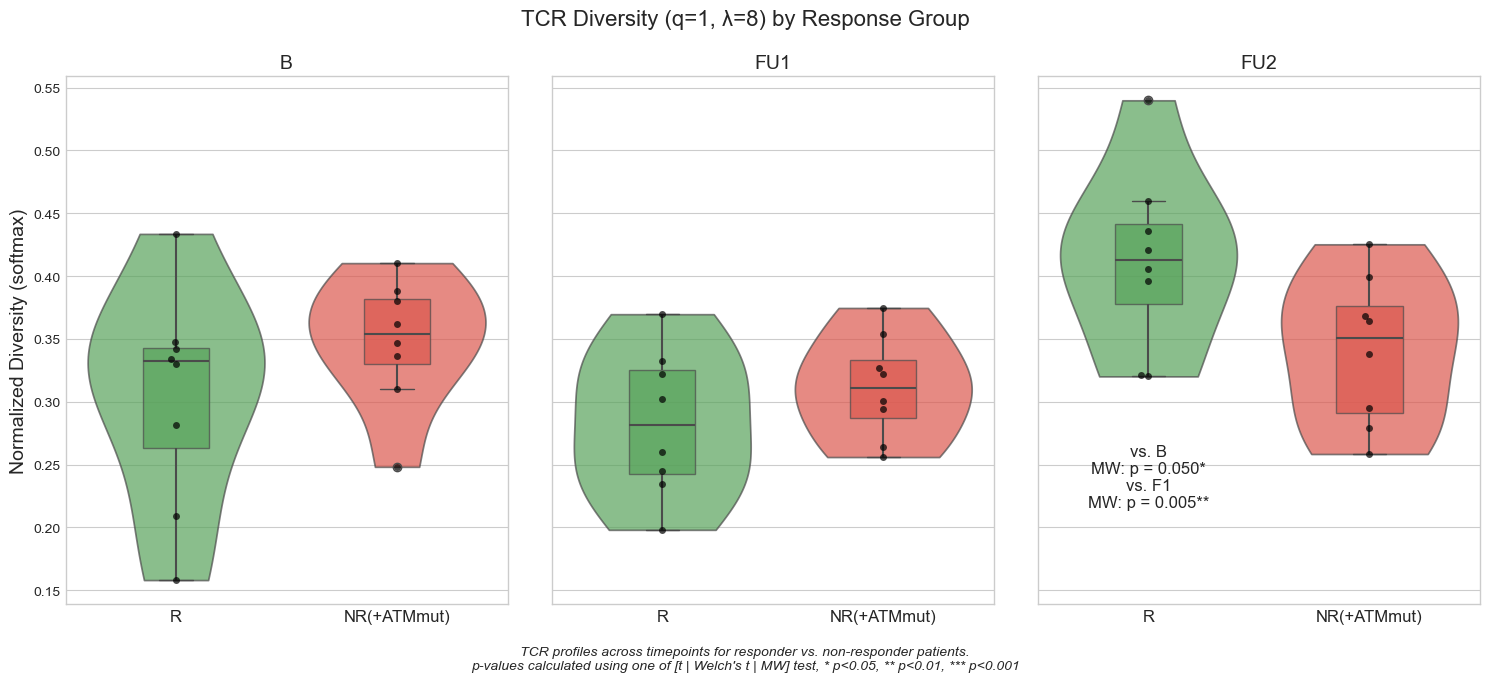

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Melt the dataframe to create a long format for easier plotting
melted_df = pd.melt(diversity_df_intact_softmax, 
                    id_vars=['patient', 'response'],
                    value_vars=['B', 'F1', 'F2'],
                    var_name='timepoint',
                    value_name='diversity')

# Create a new column that groups ATMmut. and NR together
melted_df['response_group'] = melted_df['response'].apply(lambda x: 'R' if x == 'R' else 'ATMmut./NR')

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

timepoints = ['B', 'F1', 'F2']
titles = ['B', 'FU1', 'FU2']

# Custom color palette
palette = {'R': '#4CAF50', 'ATMmut./NR': '#F44336'}

# Plot each timepoint
for i, timepoint in enumerate(timepoints):
    # Subset the data for this timepoint
    tp_data = melted_df[melted_df['timepoint'] == timepoint]
     
    # Create violin plot with boxplot inside
    sns.violinplot(data=tp_data, x='response_group', y='diversity', 
                   hue='response_group', palette=palette, legend=False,
                   alpha=0.7, cut=0, inner=None, ax=axes[i])
    
    # Add box plot inside the violin
    sns.boxplot(data=tp_data, x='response_group', y='diversity', 
                hue='response_group', palette=palette, legend=False,
                width=0.3, boxprops={'alpha': 0.7}, 
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5}, 
                ax=axes[i])
    
    # Add swarm plot for individual points
    sns.swarmplot(data=tp_data, x='response_group', y='diversity', 
                  color='black', size=5, alpha=0.7, ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('')
    
    # Only set y-label for the first subplot
    if i == 0:
        axes[i].set_ylabel('Normalized Diversity (softmax)', fontsize=14)
    else:
        axes[i].set_ylabel('')
    
    # Fix tick labels
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['R', 'NR(+ATMmut)'], fontsize=12)
    
    # Add p-value annotation
    if 'test_used_' + timepoints[i] in stat_results_in_tps:
        test_type = stat_results_in_tps['test_used_' + timepoints[i]]
        p_value = stat_results_in_tps['p_' + timepoints[i]]
        
        # Show p-values only if they are significant
        if p_value >= 0.05:
            p_text = ""
        else:
            if test_type == "t-test":
                p_text = f"t: p = {p_value:.3f}*"
            elif test_type == "Welch's t-test":
                p_text = f"Wt: p = {p_value:.3f}*"
            else:
                p_text = f"MW: p = {p_value:.3f}*"
            
            if p_value < 0.01:
                p_text += "*"
                if p_value < 0.001:
                    p_text += "*"
        

        HEIGHT_P_VAL_R_NR = 1
        y_max = tp_data['diversity'].max()
        # Adjust the position of p_text to be higher
        axes[i].text(0.5, y_max*HEIGHT_P_VAL_R_NR, p_text, ha='center', fontsize=12)
    
    # Add B vs F1 comparison for R group in the F1 plot
    if timepoint == 'F1':
        if comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F1']['Test Used'].values[0] == "t-test":
            test_text = "t"
        elif comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F1']['Test Used'].values[0] == "Welch's t-test":
            test_text = "Wt"
        else:
            test_text = "MW"

        p_r_b_vs_f1 = comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F1']['p-value'].values[0]
        
        # Show p-values only if they are significant
        if p_r_b_vs_f1 >= 0.05:
            vs_b_text = ""
        else:
            vs_b_text = f"vs. B\n{test_text}: p = {p_r_b_vs_f1:.3f}*"
            if p_r_b_vs_f1 < 0.01:
                vs_b_text = vs_b_text + "*"
                if p_r_b_vs_f1 < 0.001:
                    vs_b_text = vs_b_text + "*"
        
        y_max = tp_data['diversity'].max() # Get the maximum y-axis value for F1 plot
        # Adjust the position of vs_b_text to be lower than the p-value text
        HEIGHT_P_VAL_F1 = 0.92
        axes[i].text(0, y_max*HEIGHT_P_VAL_F1, vs_b_text, ha='center', fontsize=12)

    # Add B vs F2, F1 vs F2 comparison for R group in the F2 plot
    if timepoint == 'F2':
        if comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F2']['Test Used'].values[0] == "t-test":
            test_text = "t"
        elif comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F2']['Test Used'].values[0] == "Welch's t-test":
            test_text = "Wt"
        else:
            test_text = "MW"

        if comparison_results_in_r[comparison_results_in_r['Comparison'] == 'F1 vs F2']['Test Used'].values[0] == "t-test":
            test_text = "t"
        elif comparison_results_in_r[comparison_results_in_r['Comparison'] == 'F1 vs F2']['Test Used'].values[0] == "Welch's t-test":
            test_text = "Wt"
        else:
            test_text = "MW"
        
        p_r_f1_vs_f2 = comparison_results_in_r[comparison_results_in_r['Comparison'] == 'F1 vs F2']['p-value'].values[0]
        p_r_b_vs_f2 = comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F2']['p-value'].values[0]
        
        # Show p-values only if they are significant
        if p_r_f1_vs_f2 >= 0.05:
            vs_f1_text = ""
        else:
            vs_f1_text = f"vs. F1\n{test_text}: p = {p_r_f1_vs_f2:.3f}*"
            if p_r_f1_vs_f2 < 0.01:
                vs_f1_text = vs_f1_text + "*"
                if p_r_f1_vs_f2 < 0.001:
                    vs_f1_text = vs_f1_text + "*"

        if p_r_b_vs_f2 >= 0.05:
            vs_b_text = ""
        else:
            vs_b_text = f"vs. B\n{test_text}: p = {p_r_b_vs_f2:.3f}*"
            if p_r_b_vs_f2 < 0.01:
                vs_b_text = vs_b_text + "*"
                if p_r_b_vs_f2 < 0.001:
                    vs_b_text = vs_b_text + "*"

        
        y_max = tp_data['diversity'].max() # Get the maximum y-axis value for F2 plot
        # Aggregate vs_b_text and vs_f1_text for F2 plot
        # Adjust the position of vs_b_text to be lower than the p-value text
        HEIGHT_P_VAL_F2 = 0.4
        axes[i].text(0, y_max*(HEIGHT_P_VAL_F2+0.05), vs_b_text, ha='center', fontsize=12)
        axes[i].text(0, y_max*HEIGHT_P_VAL_F2, vs_f1_text, ha='center', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
if q_fixed == 0 and lambda_fixed == 0:
    plt.suptitle('TCR Diversity (Shannon Diversity) by Response Group', fontsize=16, y=1.05)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.suptitle('TCR Shannon Clonality by Response Group', fontsize=16, y=1.05) 
else:
    plt.suptitle(f'TCR Diversity (q={q_fixed}, λ={lambda_fixed}) by Response Group', 
             fontsize=16, y=1.05)

# Add a caption at the bottom
plt.figtext(0.5, -0.05, 
           f'TCR profiles across timepoints for responder vs. non-responder patients.\n'
           f"p-values calculated using one of [t | Welch's t | MW] test, * p<0.05, ** p<0.01, *** p<0.001",
           ha='center', fontsize=10, style='italic')

plt.show()